In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target #this is inherent in sklear data, data, target, and description

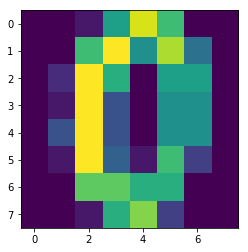

In [4]:
plt.imshow(X[10].reshape(8, 8))

### Accuracy with Imbalanced Class

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
print(digits.target_names, "\n", np.bincount(y))

[0 1 2 3 4 5 6 7 8 9] 
 [178 182 177 183 181 182 181 179 174 180]


In [8]:
y_imbalanced = []
for num in y:
    if num == 0:
        y_imbalanced.append(0)
    else:
        y_imbalanced.append(1)

In [9]:
np.bincount(y_imbalanced)

array([ 178, 1619])

### Dummy Classifier

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_imbalanced)

In [12]:
dummy_maj = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [13]:
dummy_maj.score(X_test, y_test)

0.9

In [14]:
dummy_maj.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
np.bincount(dummy_maj.predict(X_test))

array([  0, 450])

- stratified: based on training distribution
- uniform: uniformly random predictions
- constant: always predicts constant label

### Comparing our Logistic Model

In [18]:
lgr = LogisticRegression() #instantiate logreg model
#lgr_imbalanced = LogisticRegression(class_weight='balanced')

In [19]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#lgr_imbalanced.fit(X_train, y_train)

In [23]:
lgr.score(X_test, y_test) #this shows overfitting

1.0

In [24]:
#lgr_imbalanced.score(X_test, y_test)

#### We built a model! Now what?

Imagine user responses to some of the following statements:

1. The predictive model I built has an accuracy of 80%.
2. The logistic regression was optimized with L2 regularization, so you know it's good.
3. Gender was more important than age in the predictive model because it had a larger coefficient.
4. Here's the AUC chart that shows how well the model did.

How might your stakeholders respond? How would you respond back?

In a business setting, you are often the only person who can interpret what you've built. While some people may be familiar with basic data visualizations, by and large you will need to do a lot of "hand holding," especially if your team has never worked with data scientists before.

We'll focus this discussion around "simpler" problems (e.g. binary classification), but these tips apply to any type of model you might be working with.

First, let's review some of the knowledge we've developed about classification metrics, append some more, and then we'll talk about you can communicate your results.

<a href='#review-confusion-matrix'></a>
## Review: Back to the Confusion Matrix

Let's review the confusion matrix:

![](assets/images/confusion_matrix.png)

Confusion matrices, for a binary classification problem, allow for the interpretation of correct and incorrect predictions for _each class label_. Remember, the confusion matrix is the beginning step for the majority of classification metrics, and gives our predictions deeper meaning beyond an accuracy score.

**Recall:** How do we calculate the following metrics?

1. Accuracy
2. True Positive Rate
3. False Positive Rate

<a href='#intro-precision-recall'></a>
## Intro: Precision and Recall

![](assets/images/precision-recall-scatter.png)

Our previous metrics primarily were designed for less biased data problems: we could be interested in both outcomes, so it was important to generalize our approach.

Precision and Recall are additional metrics built off the confusion matrix, focusing on _information retrieval_, particularly when one class label is more interesting than another.

With _precision_, we're interested in producing a high amount of relevancy instead of irrelevancy. With _recall_, we're interesting in seeing how well a model returns specific data (literally, checking whether the model can _recall_ what a class label looked like).

**Recall** (pun not intended): If the goal of the "recall" metric "recall" is to identify specific values of a class correctly, what other metric performs a similar calculation?

> Answer: TPR is the same calculation!

#### Breaking It Down With Math

![](images/confusion_matrix_recall.png)

In fact, True Positive Rate and Recall are one in the same: calculating true positives over the count of all positives. Another term that is used when looking at labeled AUC figures is _sensitivity_. These terms all have the same calculation: the count of predicted _true positives_ over the total count of that class label.

Imagine predicting a marble color either green or red. There are 10 of each. If the model identifies 8 of the green marbles as green, the recall, or sensitivity, is .8. However, this says nothing about the number of _red_ marbles that are also identified as green.

![](images/confusion_matrix_precision.png)

Precision, or the _positive predicted value_, is calculated as the count of predicted true positives over the count of all predicted to be positive values. Precision focuses on relevancy.

Using the same example: if a model predicts 8 of the green marbles as green, then precision would be 1, because all marbles predicted as green were in fact green. The precision of red marbles (assuming all red marbles were correct, and 2 green were predicted as red) would be roughly 0.833: 10 / (10 + 2)

![](images/precision-recall-scatter.png)

**Check**: What would the precision and recall be for the following confusion matrix (with "green" being "true")?

  | predicted_green | predicted_not_green |
-------------|-----------------|--------------------
is_green     | 13              | 7
is_not_green | 8               | 12


The key difference between the two is the attribution and value of an error: should our model be more picky in avoiding false positives (precision), or should it be more picky in avoiding false negatives (recall)?

The answer should be determined by the problem you're trying to solve.

<a href='#demo-tradeoff'></a>

### Comparing Accuracy, Precision, and Recall

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, dummy_maj.predict(X_test))

array([[  0,  45],
       [  0, 405]])

In [28]:
confusion_matrix(y_test, lgr.predict(X_test))

array([[ 45,   0],
       [  0, 405]])

In [29]:
import seaborn as sns

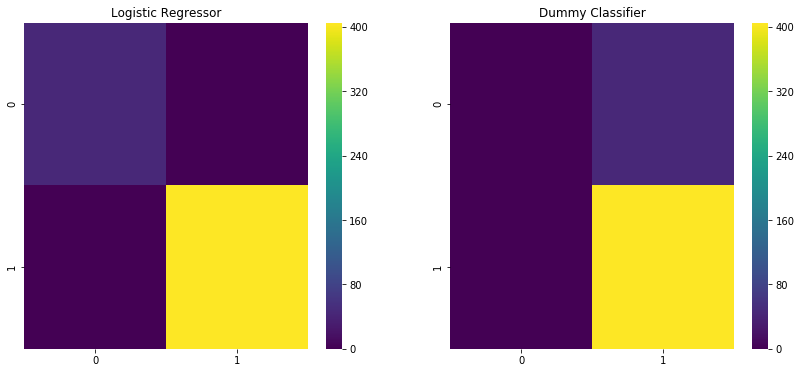

In [30]:
plt.figure(figsize = (14, 6))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, lgr.predict(X_test)), cmap = "viridis")
plt.title("Logistic Regressor")
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, dummy_maj.predict(X_test)), cmap = "viridis")
plt.title("Dummy Classifier");

In [35]:
dummy_stratified = DummyClassifier(strategy='stratified') #there are other stretegies you can use

In [36]:
dummy_stratified.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [37]:
confusion_matrix(y_test, dummy_stratified.predict(X_test))

array([[  2,  43],
       [ 32, 373]])

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [40]:
confusion_matrix(y_test, dt.predict(X_test))

array([[ 42,   3],
       [  3, 402]])

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [43]:
confusion_matrix(y_test, knn.predict(X_test))

array([[ 45,   0],
       [  0, 405]])

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, dt.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93        45
          1       0.99      0.99      0.99       405

avg / total       0.99      0.99      0.99       450



In [46]:
#f1 socre is high bc precision and recall are close in value.
# support is the total values that were calculated or used in the model